In [1]:
#Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch

In [2]:
df = pd.read_csv('Dataset C.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,Label
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,...,-0.345,-0.355,-0.365,-0.370,-0.405,-0.445,-0.480,-0.495,-0.520,N
1,-0.535,-0.505,-0.415,-0.280,-0.135,0.065,0.300,0.580,0.810,0.945,...,-0.385,-0.390,-0.390,-0.385,-0.385,-0.395,-0.390,-0.400,-0.405,S
2,-0.300,-0.295,-0.285,-0.280,-0.285,-0.285,-0.295,-0.285,-0.280,-0.275,...,-0.320,-0.310,-0.330,-0.330,-0.325,-0.310,-0.305,-0.305,-0.320,S
3,-0.395,-0.410,-0.415,-0.405,-0.385,-0.385,-0.380,-0.400,-0.400,-0.395,...,-0.370,-0.375,-0.365,-0.370,-0.380,-0.375,-0.365,-0.360,-0.360,N
4,-0.355,-0.355,-0.370,-0.365,-0.355,-0.350,-0.350,-0.350,-0.360,-0.360,...,-0.410,-0.400,-0.405,-0.390,-0.390,-0.400,-0.390,-0.390,-0.390,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49163,-0.245,-0.240,-0.240,-0.245,-0.255,-0.260,-0.280,-0.265,-0.245,-0.235,...,-0.095,-0.120,-0.135,-0.165,-0.160,-0.180,-0.195,-0.210,-0.220,N
49164,-0.230,-0.235,-0.270,-0.295,-0.295,-0.285,-0.290,-0.290,-0.290,-0.275,...,-0.445,-0.450,-0.455,-0.465,-0.445,-0.430,-0.405,-0.410,-0.395,N
49165,-0.410,-0.400,-0.390,-0.395,-0.400,-0.405,-0.405,-0.390,-0.375,-0.360,...,-0.300,-0.310,-0.315,-0.310,-0.290,-0.295,-0.290,-0.285,-0.300,N
49166,-0.300,-0.290,-0.300,-0.300,-0.295,-0.285,-0.275,-0.245,-0.245,-0.230,...,-0.400,-0.415,-0.405,-0.410,-0.400,-0.410,-0.410,-0.405,-0.395,N


In [3]:
X_input = df.iloc[:,:-1]
y_input = df.iloc[:,-1]

In [4]:
# Reshape X to (samples, 1800, 1)
X = X_input.values.reshape(X_input.shape[0], X_input.shape[1], 1)

In [5]:
# Encode labels (e.g., N=0, F=1, V=2, S=3, Q=4)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_input)

In [6]:
# Split data into train/validate/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

In [7]:
print("X_train shape:", X_train.shape)  # Should be (samples, 1800, 1)
print("y_train shape:", y_train.shape)  # Should be (samples,)
print("X_val shape:", X_val.shape)  
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)  
print("y_test shape:", y_test.shape)

X_train shape: (29500, 1800, 1)
y_train shape: (29500,)
X_val shape: (9834, 1800, 1)
y_val shape: (9834,)
X_test shape: (9834, 1800, 1)
y_test shape: (9834,)


In [9]:
def model_eval(mdoel, loader, criterion, device):
    mdoel.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = val_loss / len(loader)
    accuracy = 100 * correct/total
    return avg_loss, accuracy

In [10]:
def model_test(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / len(loader)
    accuracy = 100 * correct/total
    return avg_loss, accuracy

In [11]:
#RUN HYBRID MODEL
import torch
import torch.nn as nn
import torch.optim as optim

class HybridModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(HybridModel, self).__init__()
        
        # CNN layers
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
        )
        
        # LSTM layers
        self.lstm = nn.LSTM(input_size=64, hidden_size=64, num_layers=2, batch_first=True)
        
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(64, 128),  # Dense layer
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout
            nn.Linear(128, num_classes),  # Output layer
        )
    
    def forward(self, x):
        x = x.permute(0, 2, 1)  # Reshape for CNN (batch_size, features, sequence_length) 
        x = self.cnn(x)  # Output shape: (batch_size, 64, 90)
        x = x.permute(0, 2, 1)  # Reshape to (batch_size, 90, 64) for LSTM
        x, _ = self.lstm(x)  # Output shape: (batch_size, 90, 64)
        x = x[:, -1, :]  # Output shape: (batch_size, 64) to fully connected layer
        x = self.fc(x)  # Output shape: (batch_size, num_classes)
        
        return x

# Hyperparameters
input_size = 1  # Number of input features (1 for ECG signals)
num_classes = len(np.unique(y))  # Number of output classes (e.g., 5 for N/F/V/S/Q)

# Initialize model
model = HybridModel(input_size=input_size, num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters())  # Adam optimizer

Epoch [1/20], Train Loss: 1.3311, Train Accuracy: 39.97%,Val Loss: 1.3028, Val Acc: 41.23%
Test Loss: 1.3022, Test Accuracy: 42.26%
Epoch [2/20], Train Loss: 1.1562, Train Accuracy: 49.49%,Val Loss: 1.1265, Val Acc: 51.32%
Test Loss: 1.1310, Test Accuracy: 50.98%
Epoch [3/20], Train Loss: 1.0271, Train Accuracy: 56.01%,Val Loss: 0.9526, Val Acc: 61.20%
Test Loss: 0.9640, Test Accuracy: 59.48%
Epoch [4/20], Train Loss: 0.8575, Train Accuracy: 66.43%,Val Loss: 0.7336, Val Acc: 73.05%
Test Loss: 0.7448, Test Accuracy: 72.30%
Epoch [5/20], Train Loss: 0.7216, Train Accuracy: 72.51%,Val Loss: 0.6518, Val Acc: 75.76%
Test Loss: 0.6628, Test Accuracy: 74.55%
Epoch [6/20], Train Loss: 0.6774, Train Accuracy: 75.15%,Val Loss: 0.5908, Val Acc: 78.54%
Test Loss: 0.5964, Test Accuracy: 78.60%
Epoch [7/20], Train Loss: 0.5894, Train Accuracy: 78.61%,Val Loss: 0.5558, Val Acc: 80.41%
Test Loss: 0.5568, Test Accuracy: 80.21%
Epoch [8/20], Train Loss: 0.5740, Train Accuracy: 79.21%,Val Loss: 0.5223, V

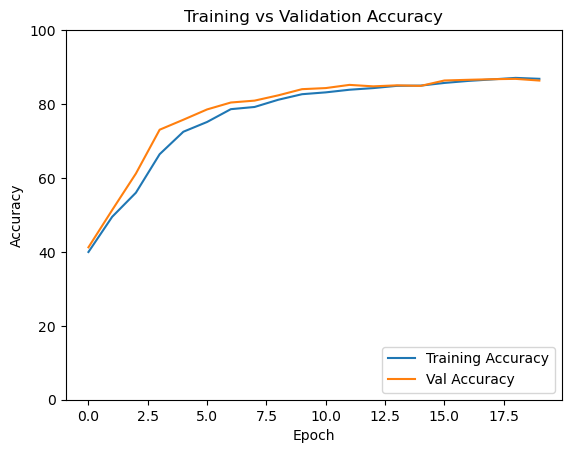

In [21]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track training metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    #Validation Loop    
    val_loss, val_acc = model_eval(model, val_loader, criterion, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,"
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Testing loop
    test_loss, test_acc = model_test(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    
# Plot training accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

In [23]:
test_loss, test_acc = model_test(model, test_loader, criterion)
print(f"Overall Test Accuracy: {test_acc:.2f}%")

Overall Test Accuracy: 86.27%


In [25]:
# Get predictions for the test set
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

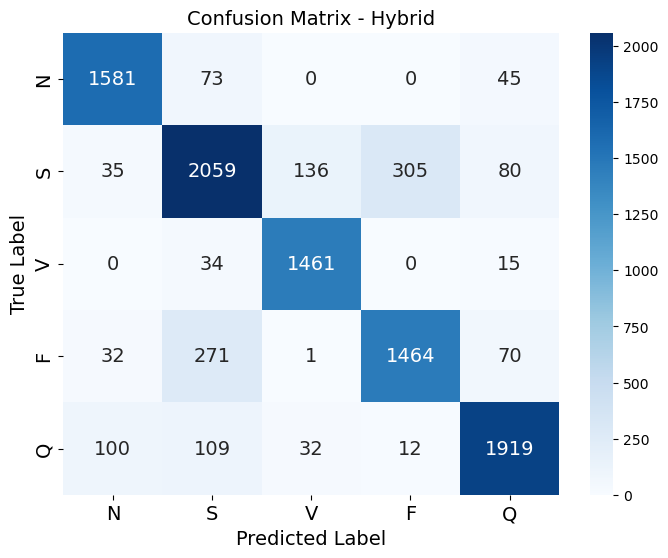

In [26]:
#Display confusion Matrix
# ECG class labels (adjust to match your encoding)
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size':14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - Hybrid', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [29]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.93      0.92      1699
           S       0.81      0.79      0.80      2615
           V       0.90      0.97      0.93      1510
           F       0.82      0.80      0.81      1838
           Q       0.90      0.88      0.89      2172

    accuracy                           0.86      9834
   macro avg       0.87      0.87      0.87      9834
weighted avg       0.86      0.86      0.86      9834



In [31]:
# Get the classification report as a dictionary
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Convert to DataFrame for easy formatting and display
report_df = pd.DataFrame(report).transpose()

# Round to 4 decimal places
report_df = report_df.round(4)

print("Classification Report (rounded to 4 decimal places):")
print(report_df)

Classification Report (rounded to 4 decimal places):
              precision  recall  f1-score    support
N                0.9045  0.9305    0.9173  1699.0000
S                0.8087  0.7874    0.7979  2615.0000
V                0.8963  0.9675    0.9306  1510.0000
F                0.8220  0.7965    0.8091  1838.0000
Q                0.9014  0.8835    0.8924  2172.0000
accuracy         0.8627  0.8627    0.8627     0.8627
macro avg        0.8666  0.8731    0.8694  9834.0000
weighted avg     0.8617  0.8627    0.8619  9834.0000


In [33]:
#Run CNN Model
import torch
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNNModel, self).__init__()
        
        # CNN layers
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=32, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),  # Conv1D
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),  # MaxPooling1D
        )
        self.cnn_output_size = self._calculate_cnn_output_size(1800)
                
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(self.cnn_output_size, 128),  # Dense layer
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout
            nn.Linear(128, num_classes),  # Output layer
        )

    def _calculate_cnn_output_size(self, input_sequence_length):
        x = torch.randn(1, 1, input_sequence_length)  # Helper function to calculate the output size of the CNN layers
        x = self.cnn(x)
        return x.view(1, -1).size(1)  # Flatten and get the number of features
    
    def forward(self, x):
        x = x.permute(0, 2, 1)  # Reshape to (batch_size, 1, 360)
        x = self.cnn(x)  # Output shape: (batch_size, 64, 90)
        x = x.view(x.size(0), -1) #Flatten to (batch_size, 64 * 90) to fully connected layer
        x = self.fc(x)  # Output shape: (batch_size, num_classes)
        
        return x

# Hyperparameters
input_size = 1  # Number of input features (1 for ECG signals)
num_classes = len(np.unique(y))  # 5 for N/F/V/S/Q

# Initialize model
model = CNNModel(input_size=input_size, num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters())  # Adam optimizer

Epoch [1/20], Train Loss: 0.9800, Train Accuracy: 60.87%,Val Loss: 0.8103, Val Acc: 68.15%
Test Loss: 0.8178, Test Accuracy: 67.64%
Epoch [2/20], Train Loss: 0.7757, Train Accuracy: 70.23%,Val Loss: 0.7185, Val Acc: 73.86%
Test Loss: 0.7291, Test Accuracy: 73.49%
Epoch [3/20], Train Loss: 0.6707, Train Accuracy: 74.82%,Val Loss: 0.6838, Val Acc: 73.96%
Test Loss: 0.6773, Test Accuracy: 74.19%
Epoch [4/20], Train Loss: 0.5899, Train Accuracy: 78.00%,Val Loss: 0.6868, Val Acc: 74.97%
Test Loss: 0.6831, Test Accuracy: 74.81%
Epoch [5/20], Train Loss: 0.5190, Train Accuracy: 80.62%,Val Loss: 0.6782, Val Acc: 75.37%
Test Loss: 0.6747, Test Accuracy: 75.26%
Epoch [6/20], Train Loss: 0.4528, Train Accuracy: 83.49%,Val Loss: 0.7130, Val Acc: 75.77%
Test Loss: 0.7123, Test Accuracy: 75.26%
Epoch [7/20], Train Loss: 0.3915, Train Accuracy: 85.74%,Val Loss: 0.7656, Val Acc: 76.39%
Test Loss: 0.7526, Test Accuracy: 76.12%
Epoch [8/20], Train Loss: 0.3462, Train Accuracy: 87.61%,Val Loss: 0.8109, V

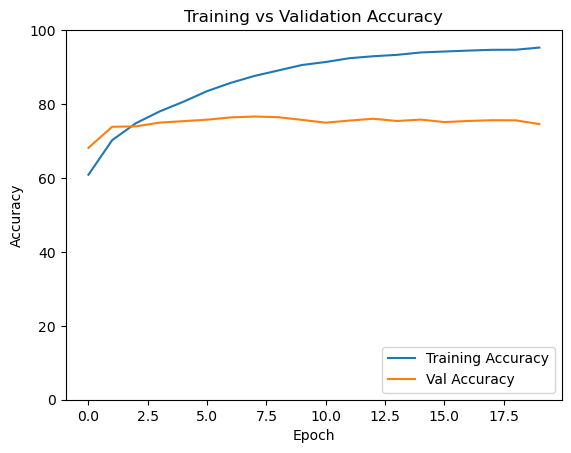

In [35]:
# Convert data to PyTorch tensors
X_train_tensor_2 = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor_2 = torch.tensor(y_train, dtype=torch.long)
X_val_tensor_2 = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor_2 = torch.tensor(y_val, dtype=torch.long)
X_test_tensor_2 = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor_2 = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor_2, y_train_tensor_2)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor_2, y_val_tensor_2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(X_test_tensor_2, y_test_tensor_2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop
train_losses_2 = []
train_accuracies_2 = []
val_losses_2 = []
val_accuracies_2 = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track training metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses_2.append(train_loss)
    train_accuracies_2.append(train_acc)

    #Validation Loop    
    val_loss, val_acc = model_eval(model, val_loader, criterion, device)
    val_losses_2.append(val_loss)
    val_accuracies_2.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,"
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Testing loop
    test_loss, test_acc = model_test(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    
# Plot training accuracy
plt.plot(train_accuracies_2, label='Training Accuracy')
plt.plot(val_accuracies_2, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

In [37]:
test_loss, test_acc = model_test(model, test_loader, criterion)
print(f"Overall Test Accuracy: {test_acc:.2f}%")

Overall Test Accuracy: 74.39%


In [38]:
# Get predictions for the test set
y_true_2 = []
y_pred_2 = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true_2.extend(labels.cpu().numpy())
        y_pred_2.extend(predicted.cpu().numpy())

y_true_2 = np.array(y_true_2)
y_pred_2 = np.array(y_pred_2)

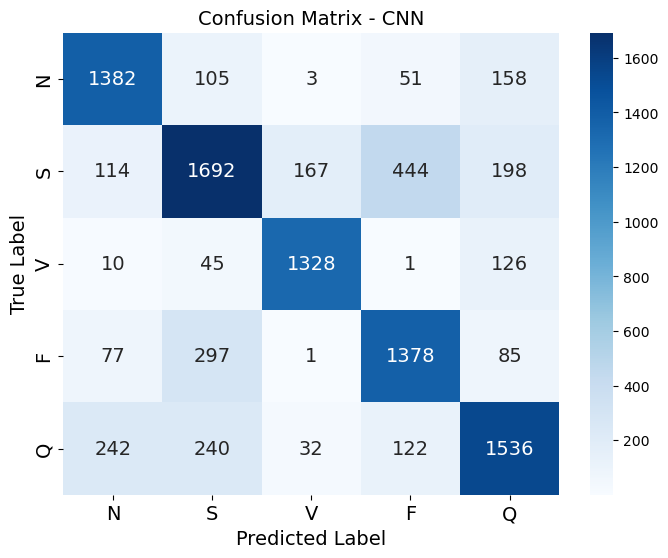

In [39]:
#Display confusion matrix
# ECG class labels (adjust to match your encoding)
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_2, y_pred_2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size':14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - CNN', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [43]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_2, y_pred_2, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

           N       0.76      0.81      0.78      1699
           S       0.71      0.65      0.68      2615
           V       0.87      0.88      0.87      1510
           F       0.69      0.75      0.72      1838
           Q       0.73      0.71      0.72      2172

    accuracy                           0.74      9834
   macro avg       0.75      0.76      0.75      9834
weighted avg       0.74      0.74      0.74      9834



In [45]:
# Get the classification report as a dictionary
report_2 = classification_report(y_true_2, y_pred_2, target_names=class_labels, output_dict=True)

# Convert to DataFrame for easy formatting and display
report_df_2 = pd.DataFrame(report_2).transpose()

# Round to 4 decimal places
report_df_2 = report_df_2.round(4)

print("Classification Report (rounded to 4 decimal places):")
print(report_df_2)

Classification Report (rounded to 4 decimal places):
              precision  recall  f1-score    support
N                0.7573  0.8134    0.7843  1699.0000
S                0.7112  0.6470    0.6776  2615.0000
V                0.8674  0.8795    0.8734  1510.0000
F                0.6904  0.7497    0.7188  1838.0000
Q                0.7304  0.7072    0.7186  2172.0000
accuracy         0.7439  0.7439    0.7439     0.7439
macro avg        0.7513  0.7594    0.7546  9834.0000
weighted avg     0.7435  0.7439    0.7429  9834.0000


In [ ]:
NOW TEST FOR THE LSTM ON DATASET C

In [47]:
#RUN LSTM MODEL
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layers
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.3)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=0.3)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, num_classes)
        
        # Dropout
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # LSTM layers
        out, _ = self.lstm1(x, (h0, c0))
        out = self.bn1(out.transpose(1, 2)).transpose(1, 2)  # BatchNorm after LSTM
        out = self.dropout(out)
        
        out, _ = self.lstm2(out, (h0, c0))
        out = self.bn2(out.transpose(1, 2)).transpose(1, 2)  # BatchNorm after LSTM
        out = self.dropout(out)
        
        # Take the output of the last time step
        out = out[:, -1, :]
        
        # Fully connected layers
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        
        return out

# Hyperparameters
input_size = 1  # Number of features per time step
hidden_size = 64  # Number of LSTM units
num_layers = 1  # Number of LSTM layers
num_classes = len(np.unique(y))  # Number of output classes

# Initialize model
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

C:\Users\User\anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


Epoch [1/20], Train Loss: 1.4375, Train Accuracy: 36.50%,Val Loss: 1.3672, Val Acc: 39.57%
Test Loss: 1.3749, Test Accuracy: 39.89%
Epoch [2/20], Train Loss: 1.2932, Train Accuracy: 44.14%,Val Loss: 1.1413, Val Acc: 51.40%
Test Loss: 1.1427, Test Accuracy: 50.81%
Epoch [3/20], Train Loss: 1.0516, Train Accuracy: 55.60%,Val Loss: 0.9654, Val Acc: 59.01%
Test Loss: 0.9720, Test Accuracy: 58.30%
Epoch [4/20], Train Loss: 0.9852, Train Accuracy: 59.08%,Val Loss: 0.9735, Val Acc: 60.06%
Test Loss: 0.9808, Test Accuracy: 59.36%
Epoch [5/20], Train Loss: 0.9578, Train Accuracy: 61.57%,Val Loss: 1.1001, Val Acc: 55.96%
Test Loss: 1.1105, Test Accuracy: 55.27%
Epoch [6/20], Train Loss: 0.9729, Train Accuracy: 60.91%,Val Loss: 0.9340, Val Acc: 60.96%
Test Loss: 0.9396, Test Accuracy: 61.31%
Epoch [7/20], Train Loss: 0.8720, Train Accuracy: 65.19%,Val Loss: 1.0048, Val Acc: 63.24%
Test Loss: 0.9963, Test Accuracy: 63.27%
Epoch [8/20], Train Loss: 1.0223, Train Accuracy: 58.58%,Val Loss: 0.9426, V

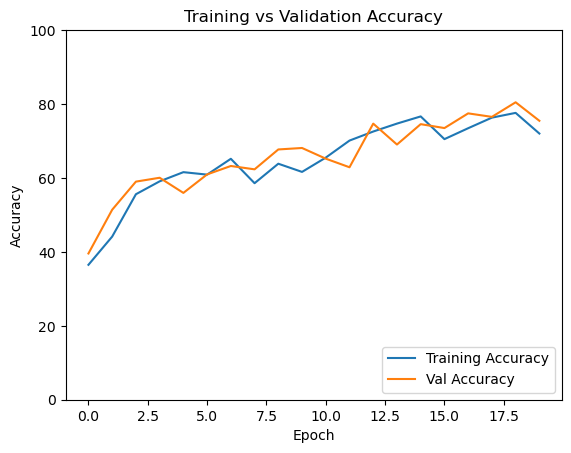

In [49]:
# Convert data to PyTorch tensors
X_train_tensor_3 = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor_3 = torch.tensor(y_train, dtype=torch.long)
X_val_tensor_3 = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor_3 = torch.tensor(y_val, dtype=torch.long)
X_test_tensor_3 = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor_3 = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for batching
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor_3, y_train_tensor_3)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor_3, y_val_tensor_3)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = TensorDataset(X_test_tensor_3, y_test_tensor_3)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Training loop
train_losses_3 = []
train_accuracies_3 = []
val_losses_3 = []
val_accuracies_3 = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track training metrics
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss /= len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses_3.append(train_loss)
    train_accuracies_3.append(train_acc)

    #Validation Loop    
    val_loss, val_acc = model_eval(model, val_loader, criterion, device)
    val_losses_3.append(val_loss)
    val_accuracies_3.append(val_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%,"
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    # Testing loop
    test_loss, test_acc = model_test(model, test_loader, criterion)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")
    
# Plot training accuracy (took around 4 mins)
plt.plot(train_accuracies_3, label='Training Accuracy')
plt.plot(val_accuracies_3, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

In [50]:
test_loss, test_acc = model_test(model, test_loader, criterion)
print(f"Overall Test Accuracy: {test_acc:.2f}%")

Overall Test Accuracy: 74.67%


In [51]:
# Get predictions for the test set
y_true_3 = []
y_pred_3 = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        y_true_3.extend(labels.cpu().numpy())
        y_pred_3.extend(predicted.cpu().numpy())

y_true_3 = np.array(y_true_3)
y_pred_3 = np.array(y_pred_3)

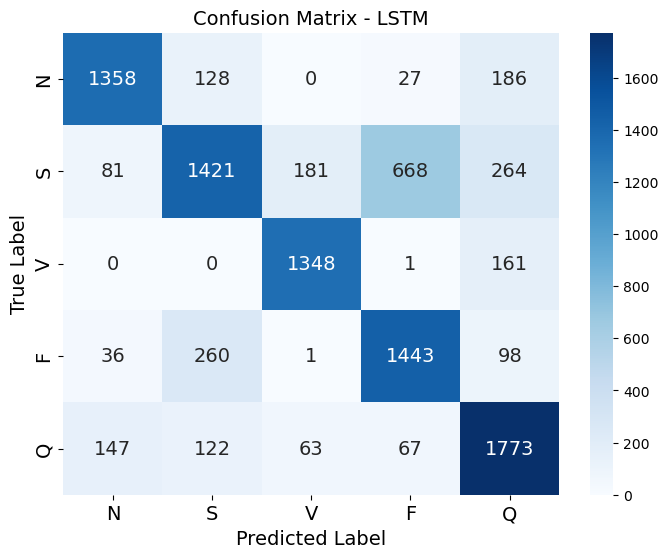

In [67]:
#Display confusion matrix
# ECG class labels (adjust to match your encoding)
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_3, y_pred_3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, annot_kws={'size':14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - LSTM', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [53]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_3, y_pred_3, target_names=class_labels))

Classification Report:
              precision    recall  f1-score   support

           N       0.84      0.80      0.82      1699
           S       0.74      0.54      0.63      2615
           V       0.85      0.89      0.87      1510
           F       0.65      0.79      0.71      1838
           Q       0.71      0.82      0.76      2172

    accuracy                           0.75      9834
   macro avg       0.76      0.77      0.76      9834
weighted avg       0.75      0.75      0.74      9834



In [54]:
# Get the classification report as a dictionary
report_3 = classification_report(y_true_3, y_pred_3, target_names=class_labels, output_dict=True)

# Convert to DataFrame for easy formatting and display
report_df_3 = pd.DataFrame(report_3).transpose()

# Round to 4 decimal places
report_df_3 = report_df_3.round(4)

print("Classification Report (rounded to 4 decimal places):")
print(report_df_3)

Classification Report (rounded to 4 decimal places):
              precision  recall  f1-score    support
N                0.8372  0.7993    0.8178  1699.0000
S                0.7359  0.5434    0.6252  2615.0000
V                0.8462  0.8927    0.8688  1510.0000
F                0.6541  0.7851    0.7136  1838.0000
Q                0.7143  0.8163    0.7619  2172.0000
accuracy         0.7467  0.7467    0.7467     0.7467
macro avg        0.7576  0.7674    0.7575  9834.0000
weighted avg     0.7503  0.7467    0.7426  9834.0000


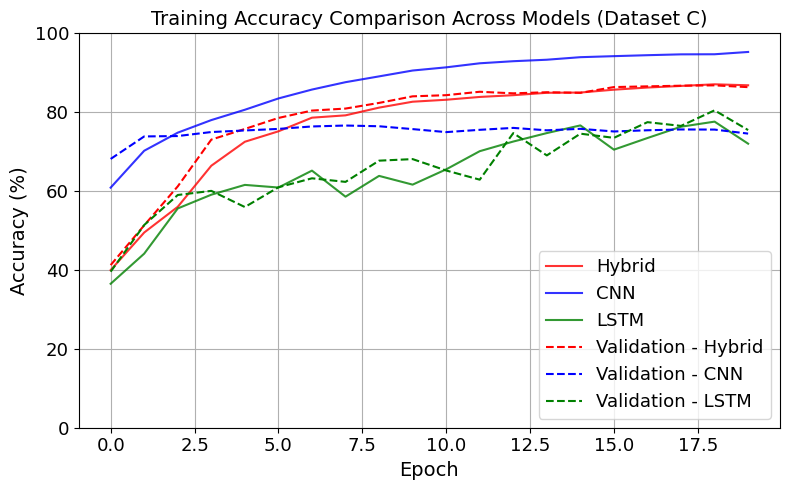

In [65]:
#Compare all 3 models
plt.figure(figsize=(8, 5))

# Plot training accuracy for all three models
plt.plot(train_accuracies, label='Hybrid', color='red', alpha = 0.8)
plt.plot(train_accuracies_2, label='CNN', color = 'blue', alpha = 0.8)
plt.plot(train_accuracies_3, label='LSTM', color = 'green', alpha = 0.8)

plt.plot(val_accuracies, label='Validation - Hybrid', color='red', linestyle = 'dashed')
plt.plot(val_accuracies_2, label='Validation - CNN', color = 'blue', linestyle = 'dashed')
plt.plot(val_accuracies_3, label='Validation - LSTM', color = 'green', linestyle = 'dashed')

# Add labels and styling
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Accuracy (%)', fontsize = 14)
plt.ylim([0, 100])
plt.title('Training Accuracy Comparison Across Models (Dataset C)', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.legend(loc='lower right', fontsize = 13)
plt.grid(True)
plt.tight_layout()
plt.show()

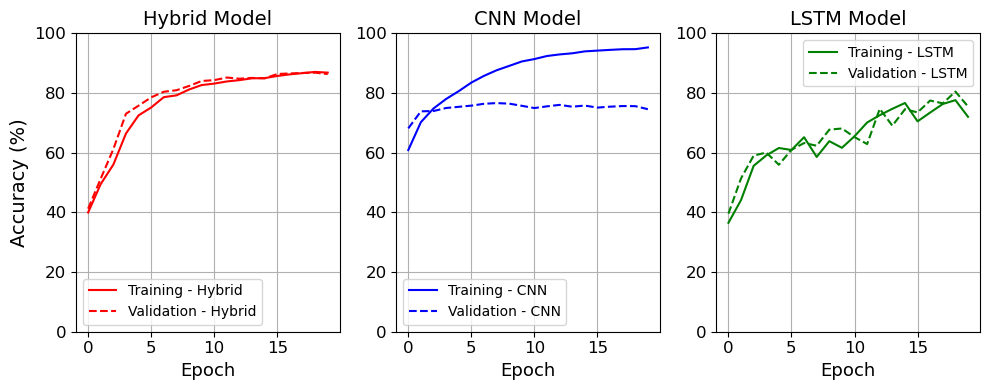

In [56]:
fig, axs = plt.subplots(1,3,figsize=(10,4),sharex=True)
#For Hybrid
axs[0].plot(train_accuracies, label='Training - Hybrid',color='red')
axs[0].plot(val_accuracies, label='Validation - Hybrid',color='red', linestyle='dashed')
axs[0].set_title('Hybrid Model', fontsize=14)
axs[0].set_xlabel('Epoch', fontsize=13)
axs[0].set_ylabel('Accuracy (%)', fontsize=14)
axs[0].set_ylim([0, 100])
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].legend()
axs[0].grid(True)

#For CNN
axs[1].plot(train_accuracies_2, label='Training - CNN',color='blue')
axs[1].plot(val_accuracies_2, label='Validation - CNN',color='blue', linestyle='dashed')
axs[1].set_title('CNN Model', fontsize=14)
axs[1].set_xlabel('Epoch', fontsize=13)
#axs[1].set_ylabel('Accuracy (%)', fontsize=12)
axs[1].set_ylim([0, 100])
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].legend()
axs[1].grid(True)

#For LSTM
axs[2].plot(train_accuracies_3, label='Training - LSTM',color='green')
axs[2].plot(val_accuracies_3, label='Validation - LSTM',color='green', linestyle='dashed')
axs[2].set_title('LSTM Model', fontsize=14)
axs[2].set_xlabel('Epoch', fontsize=13)
#axs[2].set_ylabel('Accuracy (%)', fontsize=12)
axs[2].set_ylim([0, 100])
axs[2].tick_params(axis='x', labelsize=12)
axs[2].tick_params(axis='y', labelsize=12)
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()